In [3]:
import nltk
#download the inagural corpus
nltk.download('inaugural')
#import inagural corpus address
from nltk.corpus import inaugural
print(inaugural.fileids())


['1789-Washington.txt', '1793-Washington.txt', '1797-Adams.txt', '1801-Jefferson.txt', '1805-Jefferson.txt', '1809-Madison.txt', '1813-Madison.txt', '1817-Monroe.txt', '1821-Monroe.txt', '1825-Adams.txt', '1829-Jackson.txt', '1833-Jackson.txt', '1837-VanBuren.txt', '1841-Harrison.txt', '1845-Polk.txt', '1849-Taylor.txt', '1853-Pierce.txt', '1857-Buchanan.txt', '1861-Lincoln.txt', '1865-Lincoln.txt', '1869-Grant.txt', '1873-Grant.txt', '1877-Hayes.txt', '1881-Garfield.txt', '1885-Cleveland.txt', '1889-Harrison.txt', '1893-Cleveland.txt', '1897-McKinley.txt', '1901-McKinley.txt', '1905-Roosevelt.txt', '1909-Taft.txt', '1913-Wilson.txt', '1917-Wilson.txt', '1921-Harding.txt', '1925-Coolidge.txt', '1929-Hoover.txt', '1933-Roosevelt.txt', '1937-Roosevelt.txt', '1941-Roosevelt.txt', '1945-Roosevelt.txt', '1949-Truman.txt', '1953-Eisenhower.txt', '1957-Eisenhower.txt', '1961-Kennedy.txt', '1965-Johnson.txt', '1969-Nixon.txt', '1973-Nixon.txt', '1977-Carter.txt', '1981-Reagan.txt', '1985-Reaga

[nltk_data] Downloading package inaugural to /root/nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


In [13]:
# Download the stopwords corpus
nltk.download('stopwords')
# Import the stopwords corpus from NLTK
from nltk.corpus import stopwords
# Read the Inaugural Address Corpus
texts = nltk.Text(inaugural.words())
# Convert words to lowercase and filter out non-alphabetic words
texts = [word.lower() for word in texts if word.isalpha()]
# Display the number of words in the processed text
print("Number of words in the Inaugural Address Corpus:", len(texts))
# Calculate word richness
T = len(set(texts)) / len(texts)
# Output word richness
print("Word Richness:", T)
# Import English stop words
stop_words = set(stopwords.words('english'))
# Extract words from Inaugural Address Corpus that are not in the Stop Words Corpus
filtered_words = [word for word in texts if word not in stop_words]
# Display the number of words after removing stop words
print("Number of words after removing stop words:", len(filtered_words))



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Number of words in the Inaugural Address Corpus: 138299
Word Richness: 0.06652976521883745
Number of words after removing stop words: 65522


In [16]:
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
# Import pos_tag
from nltk import pos_tag
 # Import Semantic Dictionary wordnet
from nltk.corpus import wordnet
 # Import lemmatization tool
from nltk.stem import WordNetLemmatizer
# Initialize WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
# Function for lemmatization based on PoS
def lemmatize_word(word, pos_tag):
    return lemmatizer.lemmatize(word, pos_tag[0].lower()) if pos_tag[0].lower() in ['a', 'n', 'v'] else lemmatizer.lemmatize(word)
# Part of Speech (PoS) tagging for filtered words
tagged_words = pos_tag(filtered_words)
# Lemmatization based on PoS using a list comprehension and a lambda function
lemmatized_words = [(word, lemmatize_word(word, tag)) for word, tag in tagged_words]
# Display PoS tagging results for the first 30 words
print("PoS Tagging Results (for the first 30 words):", tagged_words[:30])
# Display Lemmatization results for the first 30 words
print("Lemmatization Results (for the first 30 words):", lemmatized_words[:30])


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


PoS Tagging Results (for the first 30 words): [('fellow', 'JJ'), ('citizens', 'NNS'), ('senate', 'VBP'), ('house', 'NN'), ('representatives', 'NNS'), ('among', 'IN'), ('vicissitudes', 'NNS'), ('incident', 'JJ'), ('life', 'NN'), ('event', 'NN'), ('could', 'MD'), ('filled', 'VB'), ('greater', 'JJR'), ('anxieties', 'NNS'), ('notification', 'NN'), ('transmitted', 'VBD'), ('order', 'NN'), ('received', 'VBN'), ('day', 'NN'), ('present', 'JJ'), ('month', 'NN'), ('one', 'CD'), ('hand', 'NN'), ('summoned', 'VBD'), ('country', 'NN'), ('whose', 'WP$'), ('voice', 'NN'), ('never', 'RB'), ('hear', 'JJ'), ('veneration', 'NN')]
Lemmatization Results (for the first 30 words): [('fellow', 'fellow'), ('citizens', 'citizen'), ('senate', 'senate'), ('house', 'house'), ('representatives', 'representative'), ('among', 'among'), ('vicissitudes', 'vicissitude'), ('incident', 'incident'), ('life', 'life'), ('event', 'event'), ('could', 'could'), ('filled', 'fill'), ('greater', 'greater'), ('anxieties', 'anxiety

In [17]:
from nltk.probability import FreqDist
# Create a frequency distribution for the cleaned and filtered words
fdist = FreqDist(filtered_words)
# Extract the top 30 high-frequency words
print("Top 20 Most Common Words:")
print(fdist.most_common(20))
#Use the created frequency distribution to find the number of occurrences of the target vocabulary
fdist ['target word']
# Output in tabular form
fdist.tabulate()

Top 20 Most Common Words:
[('government', 600), ('people', 594), ('us', 502), ('must', 374), ('upon', 371), ('great', 346), ('world', 346), ('may', 343), ('states', 335), ('nation', 330), ('country', 322), ('shall', 316), ('every', 301), ('one', 272), ('peace', 259), ('new', 255), ('citizens', 248), ('power', 241), ('america', 240), ('public', 227)]
       government            people                us              must              upon             great             world               may            states            nation           country             shall             every               one             peace               new          citizens             power           america            public              time             would      constitution            united           nations             union           freedom               war              free          american               let            fellow          national              made              good               men 

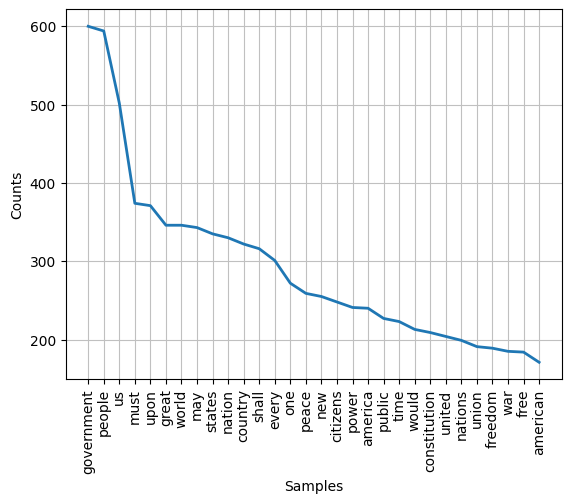

<Axes: xlabel='Samples', ylabel='Counts'>

In [29]:
fdist.plot(30)